# Set Up

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Read in Data

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/derekqin8/Caltech-CS155-2022/main/mps/CS155_mp1/data/LOANS_TRAIN.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/derekqin8/Caltech-CS155-2022/main/mps/CS155_mp1/data/LOANS_TEST.csv")

In [3]:
train_df.head()

,id,loan_amnt,term_(months),int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status
0,0,5000,36,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,credit_card,Computer,860xx,AZ,27.65,Jan-1985,3,0,13648,83.7%,9,f,Individual,NaN,0.0,Fully Paid
1,1,2500,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,car,bike,309xx,GA,1.00,Apr-1999,3,0,1687,9.4%,4,f,Individual,NaN,0.0,Charged Off
2,2,2400,36,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,small_business,real estate business,606xx,IL,8.72,Nov-2001,2,0,2956,98.5%,10,f,Individual,NaN,0.0,Fully Paid
3,3,10000,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,other,personel,917xx,CA,20.00,Feb-1996,10,0,5598,21%,37,f,Individual,NaN,0.0,Fully Paid
4,4,3000,60,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,other,Personal,972xx,OR,17.94,Jan-1996,15,0,27783,53.9%,38,f,Individual,NaN,0.0,Fully Paid


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197250 entries, 0 to 197249
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    197250 non-null  int64  
 1   loan_amnt             197250 non-null  int64  
 2   term_(months)         197250 non-null  int64  
 3   int_rate              197250 non-null  object 
 4   installment           197250 non-null  float64
 5   grade                 197250 non-null  object 
 6   sub_grade             197250 non-null  object 
 7   emp_title             184917 non-null  object 
 8   emp_length            189334 non-null  object 
 9   home_ownership        197250 non-null  object 
 10  annual_inc            197250 non-null  float64
 11  verification_status   197250 non-null  object 
 12  issue_d               197250 non-null  object 
 13  purpose               197250 non-null  object 
 14  title                 197232 non-null  object 
 15  

# Preprocess Data

In [5]:
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

In [6]:
def preprocess(train_df, test_df):
    ndf = pd.concat([train_df, test_df], axis=0)

    ord_enc = OrdinalEncoder()
    lbl_enc = LabelEncoder()
    scaler = StandardScaler()
    
    # id: drop
    ndf.drop('id', axis=1, inplace=True)
    
    # loan_amnt:
    ndf['loan_amnt'] = (ndf['loan_amnt'] - ndf['loan_amnt'].mean()) / ndf['loan_amnt'].std()
    
    # term_(months):
    ndf['36_months'] = (ndf['term_(months)'] == 36)
    ndf.drop('term_(months)', axis=1, inplace=True)
    
    # int_rate:
    ndf['int_rate'] = ndf['int_rate'].str.rstrip('%').apply(float)
    ndf['int_rate'] = (ndf['int_rate'] - ndf['int_rate'].mean()) / ndf['int_rate'].std()
    
    # installment:
    ndf['installment'] = (ndf['installment'] - ndf['installment'].mean()) / ndf['installment'].std()
    
    # grade:
    # ndf['grade'] = ord_enc.fit_transform(ndf[['grade']]) + 1
    ndf.drop('grade', axis=1, inplace=True)
    
    # sub_grade:
    ndf['sub_grade'] = ord_enc.fit_transform(ndf[['sub_grade']])
    
    # emp_title: not useful
    ndf.drop('emp_title', axis=1, inplace=True)
    
    # emp_length:
    # ndf['emp_length_num'] = ndf["emp_length"].str.replace("year","", regex=True)
    # ndf['emp_length_num'] = ndf['emp_length_num'].str.replace('s', '', regex=True)
    # ndf['emp_length_num'] = ndf['emp_length_num'].str.replace('10', '15', regex=True)
    # ndf['emp_length_num'] = ndf['emp_length_num'].str.replace('+', '', regex=True)
    # ndf['emp_length_num'] = ndf['emp_length_num'].str.replace('< 1', '0', regex=True)
    # ndf['emp_length_num'] = ndf['emp_length_num'].fillna('-1')

    # ndf['emp_length_num'] = ndf['emp_length_num'].apply(int)

    ndf.drop('emp_length', axis=1, inplace=True)
    
    # home_ownership:
    # ndf = pd.get_dummies(ndf, prefix='ho', columns=['home_ownership'])
    ndf.drop('home_ownership', axis=1, inplace=True)
    
    # annual_inc:
    ndf['annual_inc'] = (ndf['annual_inc'] - ndf['annual_inc'].mean()) / ndf['annual_inc'].std()
    
    # verification_status:
    ndf = pd.get_dummies(ndf, prefix='var', columns=['verification_status'])
    # ndf.drop('verification_status', axis=1, inplace=True)
    
    # issue_d:
    # ndf['issue_yr'] = ndf['issue_d'].str[-4:].apply(int)
    ndf.drop('issue_d', axis=1, inplace=True)
    
    # purpose:
    ndf = pd.get_dummies(ndf, prefix='purp', columns=['purpose'])
    # ndf.drop('purpose', axis=1, inplace=True)
    
    # title:
    ndf.drop('title', axis=1, inplace=True)
    
    # zip_code: not useful
    ndf.drop('zip_code', axis=1, inplace=True)
    
    # addr_state:
    # ndf['addr_state'] = lbl_enc.fit_transform(df[['addr_state']])
    ndf = pd.get_dummies(ndf, prefix='state', columns=['addr_state'])
    # ndf.drop('addr_state', axis=1, inplace=True)

    # dti:
    ndf['dti'] = (ndf['dti'] - ndf['dti'].mean()) / ndf['dti'].std()
    
    # earliest_cr_line: too hard to process :(
    ndf.drop('earliest_cr_line', axis=1, inplace=True)
    
    # open_acc:
    ndf.drop('open_acc', axis=1, inplace=True)
    
    # pub_rec:
    ndf.drop('pub_rec', axis=1, inplace=True)
    
    # revol_bal:
    ndf['revol_bal'] = (ndf['revol_bal'] - ndf['revol_bal'].mean()) / ndf['revol_bal'].std()
    
    # revol_util:
    ndf['revol_util'] = ndf['revol_util'].str.rstrip('%').apply(float)
    ndf['revol_util'] = (ndf['revol_util'] - ndf['revol_util'].mean()) / ndf['revol_util'].std()
    
    # total_acc:
    ndf.drop('total_acc', axis=1, inplace=True)
    
    # initial_list_status:
    ndf['initial_list_status'] = (ndf['initial_list_status'] == 'f')
    
    # application_type: not useful
    ndf.drop('application_type', axis=1, inplace=True)
    
    # mort_acc:
    # ndf['mort_acc'] = ndf['mort_acc'].fillna(0)
    ndf.drop('mort_acc', axis=1, inplace=True)
    
    # pub_rec_bankruptcies:

    X_train = ndf[:train_df.shape[0]].copy()
    X_train['loan_status'] = (X_train['loan_status'] == 'Charged Off')
    X_train[X_train.isnull()] = 0.0

    X_test = ndf[-test_df.shape[0]:].copy()
    X_test.drop('loan_status', axis=1, inplace=True)
    X_test[X_test.isnull()] = 0

    return X_train, X_test

In [7]:
train, test = preprocess(train_df, test_df)

In [8]:
train

,loan_amnt,int_rate,installment,sub_grade,annual_inc,dti,revol_bal,revol_util,initial_list_status,pub_rec_bankruptcies,loan_status,36_months,var_Not Verified,var_Source Verified,var_Verified,purp_car,purp_credit_card,purp_debt_consolidation,purp_educational,purp_home_improvement,purp_house,purp_major_purchase,purp_medical,purp_moving,purp_other,purp_renewable_energy,purp_small_business,purp_vacation,purp_wedding,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-1.082489,-0.721192,-1.070480,6.0,-0.809853,1.173827,-0.111758,1.125331,True,0.0,False,True,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.388118,0.312263,-1.492678,13.0,-0.708519,-1.654911,-0.745461,-1.909420,True,0.0,True,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.400343,0.466610,-1.392291,14.0,-1.008264,-0.835479,-0.678229,1.729830,True,0.0,False,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.471231,-0.085908,-0.347531,10.0,-0.384251,0.361825,-0.538253,-1.435623,True,0.0,False,True,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.326992,-0.264861,-1.460062,9.0,0.135928,0.143168,0.637125,-0.091837,True,0.0,False,False,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197245,-1.510369,-1.336343,-1.545494,3.0,-0.505852,0.173950,-0.644268,-1.088445,True,0.0,False,True,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197246,0.026944,-1.112652,0.093433,4.0,-0.607185,0.595342,0.090893,-0.369580,True,0.0,False,True,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197247,-0.348980,0.048307,-0.195394,9.0,-0.455185,-0.815312,-0.360344,-0.508452,True,0.0,False,True,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
197248,2.144952,2.030213,1.885439,25.0,0.220373,0.867070,0.391665,0.868010,True,0.0,True,False,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
test

,loan_amnt,int_rate,installment,sub_grade,annual_inc,dti,revol_bal,revol_util,initial_list_status,pub_rec_bankruptcies,36_months,var_Not Verified,var_Source Verified,var_Verified,purp_car,purp_credit_card,purp_debt_consolidation,purp_educational,purp_home_improvement,purp_house,purp_major_purchase,purp_medical,purp_moving,purp_other,purp_renewable_energy,purp_small_business,purp_vacation,purp_wedding,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-1.085545,-1.754646,-1.117395,0.0,-0.083628,-1.618822,-0.777885,-1.946180,True,0.0,True,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,-1.082489,0.936362,-0.996521,16.0,-0.032961,1.825551,-0.277217,-1.121120,True,0.0,True,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.471231,-1.754646,-0.490736,0.0,-0.541487,1.086788,-0.225455,-1.235485,True,0.0,True,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.082489,-0.721192,-1.070480,6.0,-0.505852,-0.038338,0.143609,1.043641,True,0.0,True,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.017775,-0.611583,0.144036,6.0,-0.590296,-0.605147,-0.204263,-0.214371,True,0.0,True,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42475,2.585057,2.104031,2.328084,26.0,0.647663,0.311937,1.786490,1.529692,True,0.0,False,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
42476,0.949943,0.101993,0.339114,10.0,-0.260996,0.256743,-0.013903,0.096048,True,0.0,False,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
42477,1.973800,1.810995,1.655083,24.0,0.264284,-0.502187,-0.156474,0.745476,True,0.0,False,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
42478,0.118632,-0.392365,0.283267,7.0,-0.708519,0.442495,0.095661,1.059979,True,0.0,True,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197250 entries, 0 to 197249
Data columns (total 80 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                197250 non-null  float64
 1   int_rate                 197250 non-null  float64
 2   installment              197250 non-null  float64
 3   sub_grade                197250 non-null  float64
 4   annual_inc               197250 non-null  float64
 5   dti                      197250 non-null  float64
 6   revol_bal                197250 non-null  float64
 7   revol_util               197250 non-null  float64
 8   initial_list_status      197250 non-null  bool   
 9   pub_rec_bankruptcies     197250 non-null  float64
 10  loan_status              197250 non-null  bool   
 11  36_months                197250 non-null  bool   
 12  var_Not Verified         197250 non-null  uint8  
 13  var_Source Verified      197250 non-null  uint8  
 14  var_

# Model Fit

## Neural Network

In [11]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.metrics import roc_auc_score

In [12]:
X = train.drop('loan_status', axis=1)
y = train['loan_status']

In [13]:
ntrain = round(0.8*X.values.shape[0])
ntest = X.values.shape[0] - ntrain
print(ntrain)
print(ntest)
batch_size=1024
X_np = torch.from_numpy(np.vstack(X.values).astype(float)).float()
y_np = torch.from_numpy(y.values.astype(float)).float().reshape((y.values.shape[0], 1))

test_np = torch.from_numpy(np.vstack(test.values).astype(float)).float()

print(X_np.shape)
print(y_np.shape)

permute = np.random.permutation(len(X_np))
X_np, y_np = X_np[permute], y_np[permute]

# full_ds = torch.utils.data.TensorDataset(X_np, y_np)

# [train_ds, cv_ds] = torch.utils.data.random_split(full_ds, [ntrain, ntest])

X_train = X_np[:ntrain]
y_train = y_np[:ntrain]

X_cv = X_np[ntrain:]
y_cv = y_np[ntrain:]

print(X_train.shape)
print(y_train.shape)

print(X_cv.shape)
print(y_cv.shape)

print(X_train)
print(X_cv)

train_ds = torch.utils.data.TensorDataset(X_train, y_train)
cv_ds = torch.utils.data.TensorDataset(X_cv, y_cv)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
cv_loader = torch.utils.data.DataLoader(cv_ds, batch_size=batch_size, shuffle=False)

157800
39450
torch.Size([197250, 79])
torch.Size([197250, 1])
torch.Size([157800, 79])
torch.Size([157800, 1])
torch.Size([39450, 79])
torch.Size([39450, 1])
tensor([[ 0.1400,  0.5404,  0.4318,  ...,  0.0000,  0.0000,  0.0000],
        [-1.2047, -0.7011, -1.2032,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.3625,  0.8693,  0.8500,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.5324,  0.1020, -0.4012,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0178,  0.7596, -0.3038,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.9958, -1.3990,  1.0712,  ...,  0.0000,  0.0000,  0.0000]])
tensor([[ 1.3870,  2.3769,  1.2627,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.6076,  0.3883,  0.9592,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2267,  0.0483, -0.0552,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.4712,  0.1020, -0.3308,  ...,  0.0000,  0.0000,  0.0000],
        [-1.0825,  0.4800, -1.2394,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2267,  1.1533,  0.0653,  ...,  0.

In [14]:
p = 0.4
from torch.nn.modules.activation import Softmax
model = nn.Sequential(
    nn.Linear(X_np.shape[1], 400),
    nn.BatchNorm1d(400),
    nn.LeakyReLU(),
    nn.Dropout(p),

    nn.Linear(400, 500),
    nn.BatchNorm1d(500),
    nn.LeakyReLU(),
    nn.Dropout(p),

    nn.Linear(500, 1000),
    nn.BatchNorm1d(1000),
    nn.LeakyReLU(),
    nn.Dropout(p),

    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),

    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),

    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),

    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),
    
    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),

    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),

    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),

    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),

    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),

    # nn.Linear(1000, 1000),
    # nn.BatchNorm1d(1000),
    # nn.LeakyReLU(),
    # nn.Dropout(p),

    nn.Linear(1000, 500),
    nn.BatchNorm1d(500),
    nn.LeakyReLU(),
    nn.Dropout(p),

    nn.Linear(500, 400),
    nn.BatchNorm1d(400),
    nn.LeakyReLU(),
    nn.Dropout(p),

    nn.Linear(400, 200),
    nn.BatchNorm1d(200),
    nn.LeakyReLU(),

    nn.Linear(200, 100),
    nn.BatchNorm1d(100),
    nn.LeakyReLU(),

    nn.Linear(100, 50),
    nn.BatchNorm1d(50),
    nn.LeakyReLU(),

    nn.Linear(50, 1),
    nn.Sigmoid()
)
if torch.cuda.is_available():
    model = model.cuda()

In [15]:
optimizer=torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.BCELoss()

In [16]:
train_score = []
cv_score = []

train_loss = []
cv_loss = []

for epoch in range(30):
    model.train()
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        epoch_loss += loss.item()

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()

    # Track loss each epoch
    print()

    model.eval()

    with torch.no_grad():
        if torch.cuda.is_available():
            train_probs = model(X_train.cuda()).cpu()
        else:
            train_probs = model(X_train)

        train_auc = roc_auc_score(y_train, train_probs)
        train_score.append(train_auc)
        
        train_loss.append(epoch_loss/ntrain)

        print('Train Epoch:', epoch + 1, 'Loss:', epoch_loss / ntrain, 'AUC:', train_auc)

        test_loss = 0

        for data, target in cv_loader:
            if torch.cuda.is_available():
                data, target = data.cuda(), target.cuda()

            output = model(data)
            test_loss += loss_fn(output, target).item()

        test_loss /= len(cv_loader.dataset)

        if torch.cuda.is_available():
            test_probs = model(X_cv.cuda()).cpu()
        else:
            test_probs = model(X_cv)

        test_auc = roc_auc_score(y_cv, test_probs)
        cv_score.append(test_auc)
        
        cv_loss.append(test_loss)

        print('Test Epoch:', epoch + 1, 'Loss:', test_loss, 'AUC:', test_auc)


Train Epoch: 1 Loss: 0.0006549522828390995 AUC: 0.6294364297520538
Test Epoch: 1 Loss: 0.0005174312936035853 AUC: 0.6349891185797542

Train Epoch: 2 Loss: 0.0005159601461524745 AUC: 0.662742107815944
Test Epoch: 2 Loss: 0.0004551433519718765 AUC: 0.6637172951848322

Train Epoch: 3 Loss: 0.00044893849371957235 AUC: 0.6736833650660903
Test Epoch: 3 Loss: 0.00043528850389826283 AUC: 0.6737587963594878

Train Epoch: 4 Loss: 0.0004233417056585899 AUC: 0.6767398449522398
Test Epoch: 4 Loss: 0.000416743831640565 AUC: 0.6777671029812543

Train Epoch: 5 Loss: 0.0004104119172869829 AUC: 0.6789830323317536
Test Epoch: 5 Loss: 0.0004076545365409706 AUC: 0.6799516417139566

Train Epoch: 6 Loss: 0.0004036436134569243 AUC: 0.6808365740084968
Test Epoch: 6 Loss: 0.00040064581069051844 AUC: 0.6817419741178112

Train Epoch: 7 Loss: 0.00039967526878845254 AUC: 0.6823001658366096
Test Epoch: 7 Loss: 0.0003963323169788027 AUC: 0.6835638440321932

Train Epoch: 8 Loss: 0.00039807773380527326 AUC: 0.68440317

Text(0, 0.5, 'AUC Score')

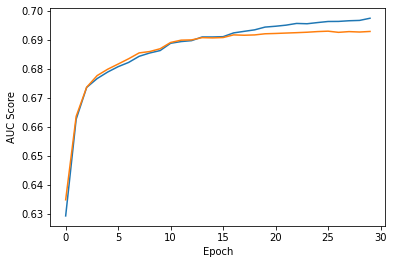

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_score)), train_score)
plt.plot(range(len(cv_score)), cv_score)
plt.xlabel('Epoch')
plt.ylabel('AUC Score')

In [18]:
model.eval()

with torch.no_grad():
    if torch.cuda.is_available():
        train_probs = model(X_np.cuda())
        print('ROC AUC score on entire training set:', roc_auc_score(y_np, train_probs.cpu()))
    else:
        train_probs = model(X_np)
        print('ROC AUC score on entire training set:', roc_auc_score(y_np, train_probs))

ROC AUC score on entire training set: 0.696623107710533


In [19]:
# if torch.cuda.is_available():
#     probs = model(test_np.cuda()).detach().cpu().numpy().reshape(-1)
# else:
#     probs = model(test_np).detach().numpy().reshape(-1)

probs = model.cpu()(test_np).detach().numpy().reshape(-1)

In [20]:
print(probs)
print(probs.shape)

[0.02382593 0.15989643 0.04268635 ... 0.3244481  0.11936334 0.16644022]
(42480,)


In [21]:
submission = pd.DataFrame({'Id': test_df['id'], 'loan_status': probs})
# you could use any filename. We choose submission here
submission.to_csv('submission.csv', index=False)

In [22]:
submission.head()

,Id,loan_status
0,200000,0.023826
1,200001,0.159896
2,200002,0.042686
3,200003,0.094522
4,200004,0.101368


In [23]:
!pip install shap
import shap

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


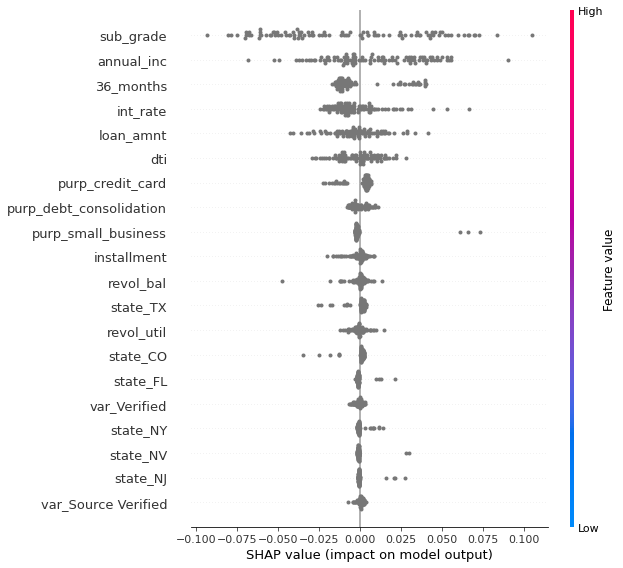

In [25]:
# It wants gradients enabled, and uses the training set
torch.set_grad_enabled(True)
e = shap.DeepExplainer(model, X_train[:100])

# Get the shap values from my test data (this explainer likes tensors)
shap_values = e.shap_values(X_cv[:100])

# Plots
#shap.force_plot(explainer.expected_value, shap_values, feature_names)
#shap.dependence_plot("b1_price_avg", shap_values, data, feature_names)
shap.summary_plot(shap_values, data, X.columns.values)